<a href="https://colab.research.google.com/github/Aihikk/HandwrittenDigitRecognition/blob/main/Handwritten_digit_classification_Deep_Nueral_network_1st_class_of_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Layer Perceptron (MLP) is an artificial neural network widely used for solving classification and regression tasks.

MLP consists of fully connected dense layers that transform input data from one dimension to another. It is called "multi-layer" because it contains an input layer, one or more hidden layers, and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs, making it a powerful tool for various machine learning tasks.

Key Components of Multi-Layer Perceptron (MLP)

Input Layer: Each neuron (or node) in this layer corresponds to an input feature. For instance, if you have three input features, the input layer will have three neurons.

Hidden Layers: An MLP can have any number of hidden layers, with each layer containing any number of nodes. These layers process the information received from the input layer.

Output Layer: The output layer generates the final prediction or result. If there are multiple outputs, the output layer will have a corresponding number of neurons.



![ANN](https://media.geeksforgeeks.org/wp-content/uploads/nodeNeural.jpg)

Working of Multi-Layer Perceptron

Let's delve in to the working of the multi-layer perceptron. The key mechanisms such as forward propagation, loss function, backpropagation, and optimization.

Step 1: Forward Propagation

In forward propagation, the data flows from the input layer to the output layer, passing through any hidden layers.

Step 2: Loss Function

Once the network generates an output, the next step is to calculate the loss using a loss function. In supervised learning, this compares the predicted output to the actual label.

Step 3: Backpropagation

The goal of training an MLP is to minimize the loss function by adjusting the network's weights and biases. This is achieved through backpropagation:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist= tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8671 - loss: 0.4725
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9651 - loss: 0.1122
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0689
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0508
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0376
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0238
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0176
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9951 - loss: 0.0143
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0134


In [ ]:
model.save('handwrittendigit.keras')

In [ ]:
model=tf.keras.models.load_model('handwrittendigit.keras')

loss,accuracy=model.evaluate(x_test,y_test)

loss
accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.1137


0.9760000109672546

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
The digit is probably a 7


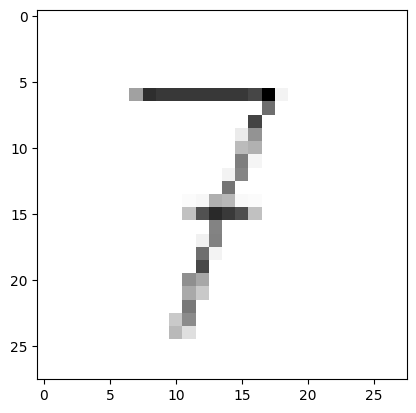

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The digit is probably a 5


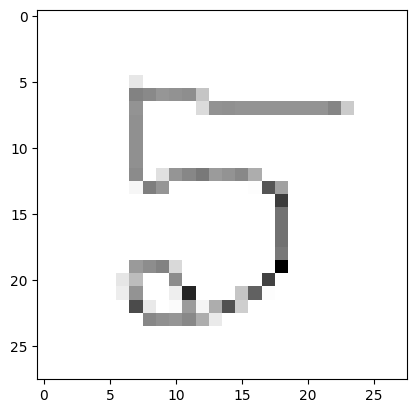

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The digit is probably a 6


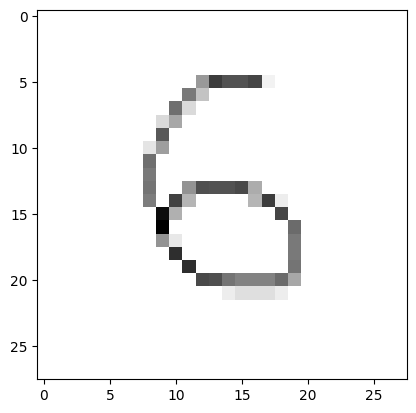

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The digit is probably a 4


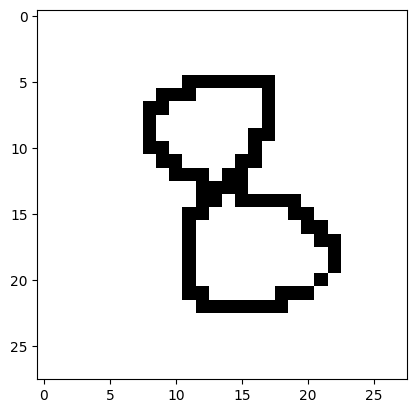

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The digit is probably a 3


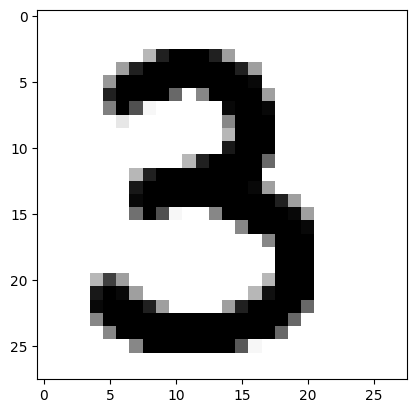

In [ ]:
model=tf.keras.models.load_model('handwrittendigit.keras')
no=1
while os.path.isfile(f"digits/image{no}.png"):
  try:
    img=cv2.imread(f"digits/image{no}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The digit is probably a {np.argmax(prediction)}")
    try:
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
    except Exception as e:
      print(f"An error occurred: {e}")
  except:
      print("Error!")
  finally:
    pass
  no=no+1